In [2]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

In [3]:
def initialstate(N):
    state = 2*np.random.randint(2,size= (N,N))-1
    return state

In [4]:
def mcmove(config,beta):
    J2 = 1
    J1 = 0.75
    for i in range(N):
        for j in range(N):
            a = np.random.randint(0,N)
            b = np.random.randint(0,N)
            si = config[a,b]
            nb = config[(a+1)%N,b] + config[(a-1)%N,b] + config[a,(b-1)%N] + config[a,(b+1)%N]

            cost= 2*nb*si

            if cost < 0:
                si *= -1
                
            elif rand() < np.exp(-cost*beta):
                si *= -1

            config[a,b] = si
            

            #if j < N/2:
             #   cost = 2*(J2+(2/N)*j*(J1-J2))*si*nb

              #  if cost < 0:
               #     si *= -1
                #elif rand() < np.exp(-cost*beta):
                 #   si *= -1

                #config[a,b] = si
            #else:
             #   cost = 2*((2/N)*(J2-J1)*j-J2+2*J1)*si*nb

              #  if cost < 0:
               #     si *= -1
                #elif rand() < np.exp(-cost*beta):
                 #   si *= -1
                
                #config[a,b] = si
    return config
    


In [5]:
def calcEnergy(config):
    energy = 0

    for i in range(len(config)):
        for j in range(len(config)):
            S = config[i,j]
            nb = config[(i+1)%N,j] + config[i, (j+1)%N] + config[(i-1)%N,j] + config[i,(j-1)%N]

            energy += -S*nb
    return energy/2
    

In [6]:
def calcMag(config):
    mag = np.sum(config)
    return mag

In [7]:
nt = 32 #number of Temperature points code fast 32
N = 8 # Lattice dimension
eqSteps = 2**8
mcSteps = 2**11


T = np.linspace(1.53,2.75,nt) #switched 3.28 upper bound with 2.75
E,M,C,X,B = np.zeros(nt),np.zeros(nt),np.zeros(nt),np.zeros(nt),np.zeros(nt)
n1, n2 = 1.0/(mcSteps*N*N), 1.0/(mcSteps*mcSteps*N*N)


for ii in range(nt):
    config = initialstate(N)

    E1=M1=E2=M2=M4 = 0
    iT = 1.0/T[ii]; iT2 = iT*iT

    for i in range(eqSteps):
        mcmove(config,iT)

    for i in range(mcSteps):
        mcmove(config,iT)
        Ene = calcEnergy(config)
        Mag = calcMag(config)

        E1 = E1 + Ene
        M1 = M1 + Mag
        E2 = E2 + Ene*Ene
        M2 = M2 + Mag*Mag
        M4 = M4 + Mag*Mag*Mag*Mag

    E[ii] = n1*E1
    M[ii] = n1*M1
    C[ii] = (n1*E2 - n2*E1*E1)*iT2
    X[ii] = (n1*M2 - n2*M1*M1)*iT
    B[ii] = 1 - (n1*M4)/(3*(n2*M2*M2))




In [8]:
nt = 32 #number of Temperature points code fast 32
N = 12 # Lattice dimension
eqSteps = 2**8
mcSteps = 2**11


T2 = np.linspace(1.53,2.75,nt) #switched 3.28 upper bound with 2.75
B2 = np.zeros(nt)
n1, n2 = 1.0/(mcSteps*N*N), 1.0/(mcSteps*mcSteps*N*N)


for ii in range(nt):
    config = initialstate(N)

    M1=M2=M4 = 0
    iT = 1.0/T2[ii]; iT2 = iT*iT

    for i in range(eqSteps):
        mcmove(config,iT)

    for i in range(mcSteps):
        mcmove(config,iT)
        Mag = calcMag(config)
        #print(Mag)
        M1 = M1 + Mag
        M2 = M2 + Mag*Mag
        M4 = M4 + Mag*Mag*Mag*Mag
   
    B2[ii] = 1 - (n1*M4)/(3*(n2*M2*M2))

In [9]:
nt = 32 #number of Temperature points code fast 32
N = 16 # Lattice dimension
eqSteps = 2**8
mcSteps = 2**11


T3 = np.linspace(1.53,2.75,nt) #switched 3.28 upper bound with 2.75
B3 = np.zeros(nt)
n1, n2 = 1.0/(mcSteps*N*N), 1.0/(mcSteps*mcSteps*N*N)


for ii in range(nt):
    config = initialstate(N)

    M2=M4 = 0
    iT = 1.0/T3[ii]; iT2 = iT*iT

    for i in range(eqSteps):
        mcmove(config,iT)

    for i in range(mcSteps):
        mcmove(config,iT)
        Mag = calcMag(config)

        M2 = M2 + Mag*Mag
        M4 = M4 + Mag*Mag*Mag*Mag

    B3[ii] = 1 - (n1*M4)/(3*(n2*M2*M2))

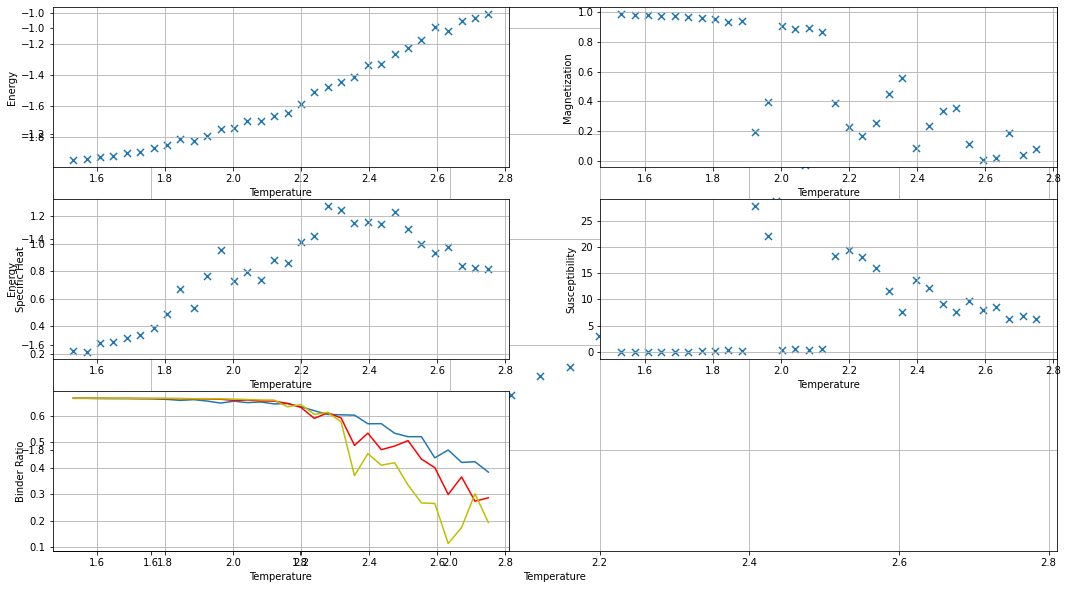

In [10]:
f = plt.figure(figsize=(18,10))

plt.scatter(T, E, s = 50, marker = 'x')
plt.xlabel("Temperature")
plt.ylabel("Energy")
plt.axis('tight')
plt.grid()

sp = f.add_subplot(3,2,1)
plt.scatter(T, E, s = 50, marker = 'x')
plt.xlabel("Temperature")
plt.ylabel("Energy")
plt.axis('tight')
plt.grid()

sp = f.add_subplot(3,2,2)
plt.scatter(T, abs(M), s = 50, marker = 'x')
#plt.plot(T,abs(M))
plt.xlabel("Temperature")
plt.ylabel("Magnetization")
plt.axis('tight')
plt.grid()

sp = f.add_subplot(3,2,3)
plt.scatter(T, C, s = 50, marker = 'x')
#plt.plot(T,C)
plt.xlabel("Temperature")
plt.ylabel("Specific Heat")
plt.axis('tight')
plt.grid()

sp = f.add_subplot(3,2,4)
plt.scatter(T, X, s = 50, marker = 'x')
#plt.plot(T,X)
plt.xlabel("Temperature")
plt.ylabel("Susceptibility")
plt.axis('tight')
plt.grid()

sp = f.add_subplot(3,2,5)
#plt.scatter(T, B, s = 50, marker = 'x')
#plt.scatter(T2, B2, s = 50, marker = 'o')
plt.plot(T,B)
plt.plot(T2,B2,'r-')
plt.plot(T3,B3, 'y-')
plt.xlabel("Temperature")
plt.ylabel("Binder Ratio")
plt.axis('tight')
plt.grid()


T: [2.08096774 2.12032258 2.15967742 2.19903226 2.2383871  2.27774194
 2.31709677 2.35645161 2.39580645 2.43516129 2.47451613 2.51387097
 2.55322581 2.59258065 2.63193548 2.67129032 2.71064516 2.75      ]
T2: [2.08096774 2.12032258 2.15967742 2.19903226 2.2383871  2.27774194
 2.31709677 2.35645161 2.39580645 2.43516129 2.47451613 2.51387097
 2.55322581 2.59258065 2.63193548 2.67129032 2.71064516 2.75      ]
B: [0.65204708 0.64452454 0.64592888 0.63371222 0.61867103 0.60456163
 0.60307605 0.60182738 0.56898286 0.5693536  0.53291887 0.51967489
 0.51984746 0.43913754 0.46916533 0.42182686 0.42437027 0.38464759]
B2: [0.65600059 0.65533697 0.64652816 0.631274   0.58941357 0.6108002
 0.5911942  0.48670098 0.53308486 0.47045044 0.48407802 0.50473193
 0.43434779 0.40176049 0.29981582 0.36632835 0.27397429 0.28696153]


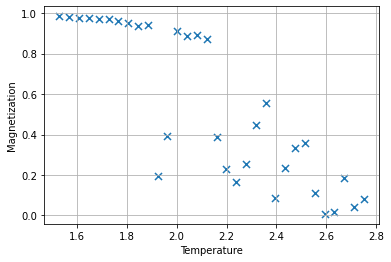

In [11]:
plt.scatter(T, abs(M), s = 50, marker = 'x')
#plt.plot(T,abs(M))
plt.xlabel("Temperature")
plt.ylabel("Magnetization")
plt.axis('tight')
plt.grid()

print('T:' , T[14:])
print('T2:', T2[14:])
print('B:', B[14:])
print('B2:', B2[14:])

In [12]:
T = [[1.53  1.58645161 1.64290323 1.69935484 1.75580645 1.81225806
 1.86870968 1.92516129 1.9816129  2.03806452 2.09451613 2.15096774
 2.20741935 2.26387097 2.32032258 2.37677419 2.43322581 2.48967742
 2.54612903 2.60258065 2.65903226 2.71548387 2.77193548 2.8283871
 2.88483871 2.94129032 2.99774194 3.05419355 3.11064516 3.16709677
 3.22354839 3.28],]
 B = [[0.66618741 0.6661361  0.66583771 0.66556104 0.6651421  0.66480757
 0.66388623 0.66316536 0.65938837 0.65793566 0.65478729 0.64443945
 0.59354884 0.62031789 0.57703325 0.53219722 0.49497279 0.41860028
 0.41458151 0.38133146 0.30134259 0.2770106  0.27320546 0.26047662
 0.16274762 0.18484055 0.16738514 0.14531203 0.09540265 0.07133785
 0.13488684 0.13227837],]

 print(np.mean(B))

SyntaxError: invalid syntax (<ipython-input-12-0c331bdb098d>, line 1)